In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/aljowharahalshabaan/projectt6/day35_project.csv


In [40]:
"""
Day 30 Activity: EDA Exercise
Tasks:
1) Load dataset
2) Run univariate, bivariate, and correlation analysis
3) Write 3 insights
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# TODO: Load data from data/day30_eda.csv
df = pd.read_csv("/kaggle/input/datasets/aljowharahalshabaan/projectt6/day35_project.csv")

# TODO: Perform basic EDA and write insights

In [41]:
print("Shape:", df.shape, "\nDtypes:\n", df.dtypes)
missing = df.isna().sum().sort_values(ascending=False)
print("Missing:\n", missing)

Shape: (4, 4) 
Dtypes:
 age         int64
income      int64
spend       int64
segment    object
dtype: object
Missing:
 age        0
income     0
spend      0
segment    0
dtype: int64


In [42]:
numeric_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("Numeric:", numeric_cols.tolist(), "\nCategorical:", cat_cols.tolist())

Numeric: ['age', 'income', 'spend'] 
Categorical: ['segment']


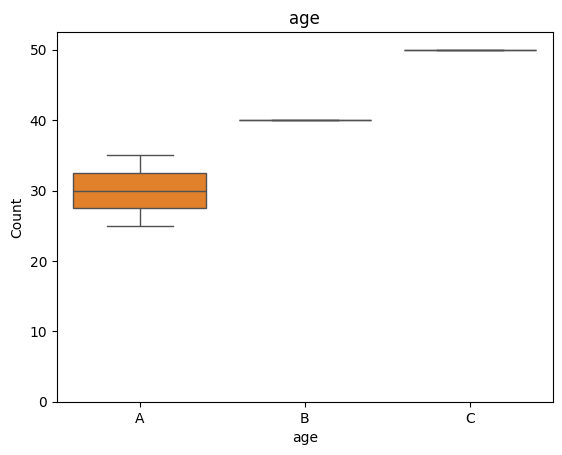

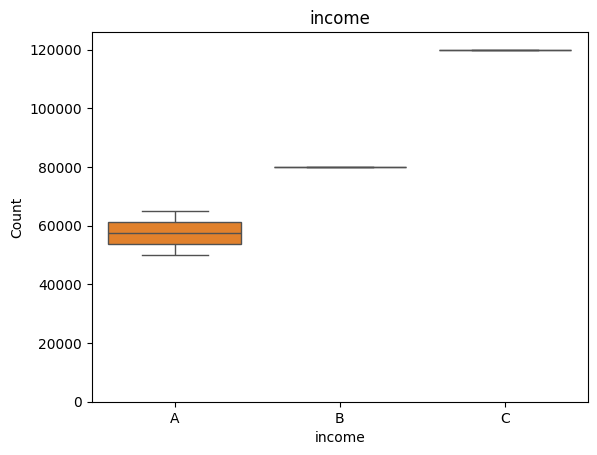

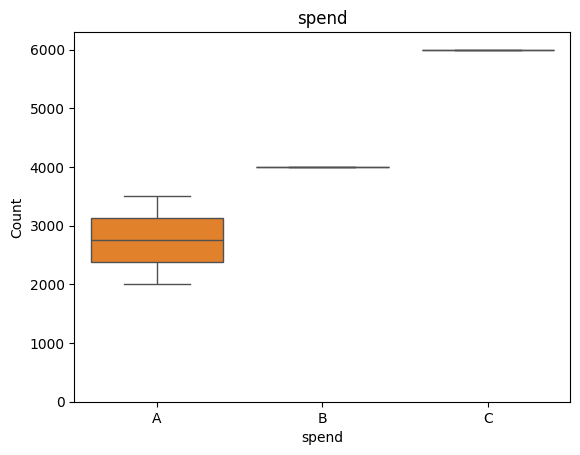

In [43]:
for col in numeric_cols[:4]:
    sns.histplot(df[col].dropna(), bins=30, kde=True); plt.title(f"{col}")
    sns.boxplot(x=cat_cols[0], y=col, data=df); plt.show()

* there is no outliers in age col
* there might be outliers in income col
* there is no outliers in spend col

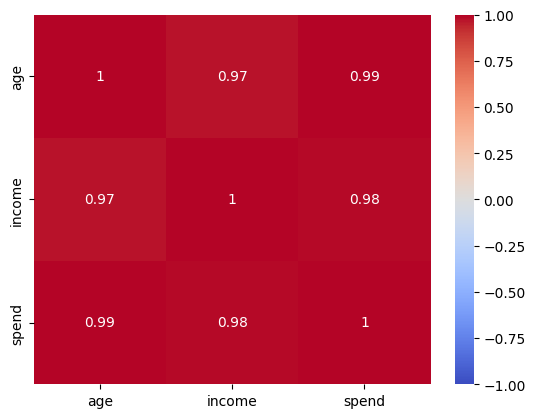

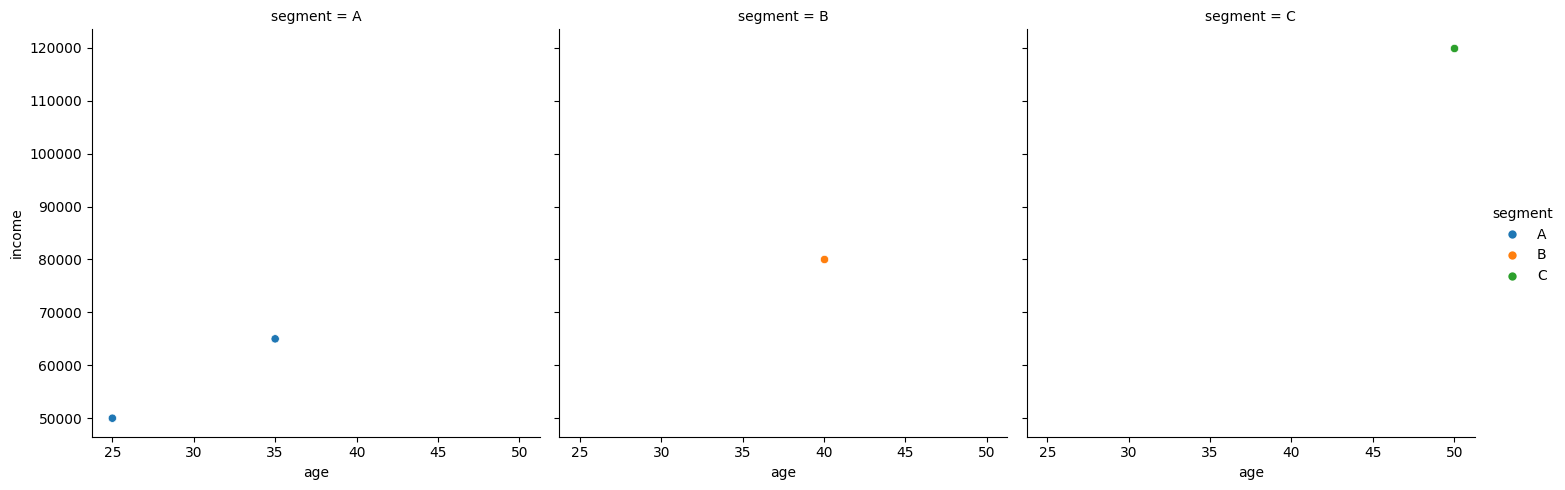

In [44]:
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", vmin=-1, vmax=1,annot=True)
g = sns.relplot(data=df, x=numeric_cols[0], y=numeric_cols[1],
hue=cat_cols[0], col=cat_cols[0], kind="scatter")

* age and spend are highly correlated pairs
* income and spend are highly correlated pairs
* maybe one of the cols is redundet

In [45]:
actions=["Use robust scaling for outliers",
         "Drop highly correlated pairs",
        "Apply transformations to skewed features"]

In [46]:
#robust scaling
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df[numeric_cols] = rob_scaler.fit_transform(df[numeric_cols])

In [47]:
#Drop highly correlated pairs
def drop_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    return df.drop(columns=to_drop), to_drop
drop_correlated_features(df[numeric_cols])

(    age
 0 -1.25
 1  0.25
 2 -0.25
 3  1.25,
 ['income', 'spend'])

In [48]:
#Apply transformations to skewed features
print(df[numeric_cols].skew())
df["income"]=np.log1p(df["income"])

age       0.000000
income    1.071000
spend     0.436662
dtype: float64


In [49]:
insights=["there is a strong skwe in income col",
         "there are outliers in income col",
         "there is no missing values"]

In [50]:
df.to_csv('/kaggle/working/cleaned_data.csv', index=False)